In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the source path in Google Drive and the destination path in Colab
source_path = '/content/drive/My Drive/features_preprocessed_full.csv'
destination_path = 'features_preprocessed_full.csv'

# Check if the source file exists
if os.path.exists(source_path):
    # Copy the file
    !cp "{source_path}" "{destination_path}"
    print(f"File copied from '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source file not found at '{source_path}'")

Mounted at /content/drive
File copied from '/content/drive/My Drive/features_preprocessed_full.csv' to 'features_preprocessed_full.csv'


In [2]:
import pandas as pd

df = pd.read_csv('features_preprocessed_full.csv')
display(df.head())

,mean,var,skew,kurtosis,ptp,hjorth_activity,hjorth_mobility,hjorth_complexity,delta_power,delta_power_norm,...,theta_power_norm,alpha_power,alpha_power_norm,beta_power,beta_power_norm,gamma_power,gamma_power_norm,spectral_entropy,digit,channel
0,-0.994682,181.571713,0.065043,-0.488986,69.658823,181.571713,0.724560,1.216738,34.522125,0.257902,...,0.066469,8.616027,0.064367,54.726136,0.408839,16.862670,0.125975,8.964570,0,AF3
1,4.542899,652.240584,0.176188,-0.591324,117.256654,652.240584,0.471750,1.217368,179.490302,0.397498,...,0.037451,23.487860,0.052016,74.408266,0.164784,20.419909,0.045222,6.243060,0,AF4
2,-0.595764,242.957278,0.748985,0.588104,81.091200,242.957278,0.679946,1.296242,144.240653,0.604000,...,0.057903,10.929314,0.045766,38.521637,0.161307,22.666292,0.094914,6.854228,0,T7
3,0.516059,338.819865,0.495659,0.187774,108.565438,338.819865,0.724805,1.263866,63.714731,0.256768,...,0.024806,16.862073,0.067953,93.025695,0.374890,30.732667,0.123851,8.550830,0,T8
4,-0.207519,159.987263,-0.038581,-0.679504,63.265561,159.987263,0.617211,1.195543,104.951056,0.631048,...,0.074482,15.544452,0.093465,23.171652,0.139326,10.918690,0.065652,6.561226,0,PZ


In [3]:
missing_values = df.isnull().sum()
display(missing_values)

,0
mean,0
var,0
skew,0
kurtosis,0
ptp,0
hjorth_activity,0
hjorth_mobility,0
hjorth_complexity,0
delta_power,0
delta_power_norm,0


In [4]:
# Identify categorical columns - based on the head, 'channel' is categorical
categorical_columns = ['channel']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the head of the new DataFrame
display(df_encoded.head())

,mean,var,skew,kurtosis,ptp,hjorth_activity,hjorth_mobility,hjorth_complexity,delta_power,delta_power_norm,...,beta_power_norm,gamma_power,gamma_power_norm,spectral_entropy,digit,channel_AF3,channel_AF4,channel_PZ,channel_T7,channel_T8
0,-0.994682,181.571713,0.065043,-0.488986,69.658823,181.571713,0.724560,1.216738,34.522125,0.257902,...,0.408839,16.862670,0.125975,8.964570,0,True,False,False,False,False
1,4.542899,652.240584,0.176188,-0.591324,117.256654,652.240584,0.471750,1.217368,179.490302,0.397498,...,0.164784,20.419909,0.045222,6.243060,0,False,True,False,False,False
2,-0.595764,242.957278,0.748985,0.588104,81.091200,242.957278,0.679946,1.296242,144.240653,0.604000,...,0.161307,22.666292,0.094914,6.854228,0,False,False,False,True,False
3,0.516059,338.819865,0.495659,0.187774,108.565438,338.819865,0.724805,1.263866,63.714731,0.256768,...,0.374890,30.732667,0.123851,8.550830,0,False,False,False,False,True
4,-0.207519,159.987263,-0.038581,-0.679504,63.265561,159.987263,0.617211,1.195543,104.951056,0.631048,...,0.139326,10.918690,0.065652,6.561226,0,False,False,True,False,False


In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns, excluding 'digit' and one-hot encoded 'channel' columns
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('digit')
numerical_cols = [col for col in numerical_cols if not col.startswith('channel_')]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the head of the DataFrame with scaled features
display(df_encoded.head())

,mean,var,skew,kurtosis,ptp,hjorth_activity,hjorth_mobility,hjorth_complexity,delta_power,delta_power_norm,...,beta_power_norm,gamma_power,gamma_power_norm,spectral_entropy,digit,channel_AF3,channel_AF4,channel_PZ,channel_T7,channel_T8
0,-0.276817,-0.068739,0.271058,-0.303514,-0.156349,-0.068739,0.321731,0.304227,-0.058960,-0.563886,...,1.024678,-0.083201,0.795639,0.996604,0,True,False,False,False,False
1,1.361795,0.013019,0.509908,-0.354415,0.282500,0.013019,-1.017743,0.312115,-0.030298,0.122730,...,-0.640421,-0.030381,-0.510668,-0.674568,0,False,True,False,False,False
2,-0.158775,-0.058076,1.740845,0.232205,-0.050944,-0.058076,0.085352,1.300265,-0.037267,1.138432,...,-0.664141,0.002974,0.293180,-0.299274,0,False,False,False,True,False
3,0.170222,-0.041424,1.196450,0.033091,0.202367,-0.041424,0.323034,0.894657,-0.053188,-0.569466,...,0.793055,0.122748,0.761289,0.742542,0,False,False,False,False,True
4,-0.043890,-0.072488,0.048372,-0.398274,-0.215295,-0.072488,-0.247036,0.038693,-0.045035,1.271472,...,-0.814110,-0.171460,-0.180181,-0.479195,0,False,False,True,False,False


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop('digit', axis=1)
y = df_encoded['digit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (52200, 24)
Shape of X_test: (13050, 24)
Shape of y_train: (52200,)
Shape of y_test: (13050,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.1229

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.12      0.12      1282
           1       0.12      0.17      0.14      1313
           2       0.12      0.14      0.13      1284
           3       0.13      0.12      0.13      1364
           4       0.12      0.13      0.12      1289
           5       0.13      0.13      0.13      1272
           6       0.12      0.11      0.11      1287
           7       0.11      0.10      0.11      1259
           8       0.13      0.12      0.12      1346
           9       0.13      0.10      0.11      1354

    accuracy                           0.12     13050
   macro avg       0.12      0.12      0.12     13050
weighted avg       0.12      0.12      0.12     13050



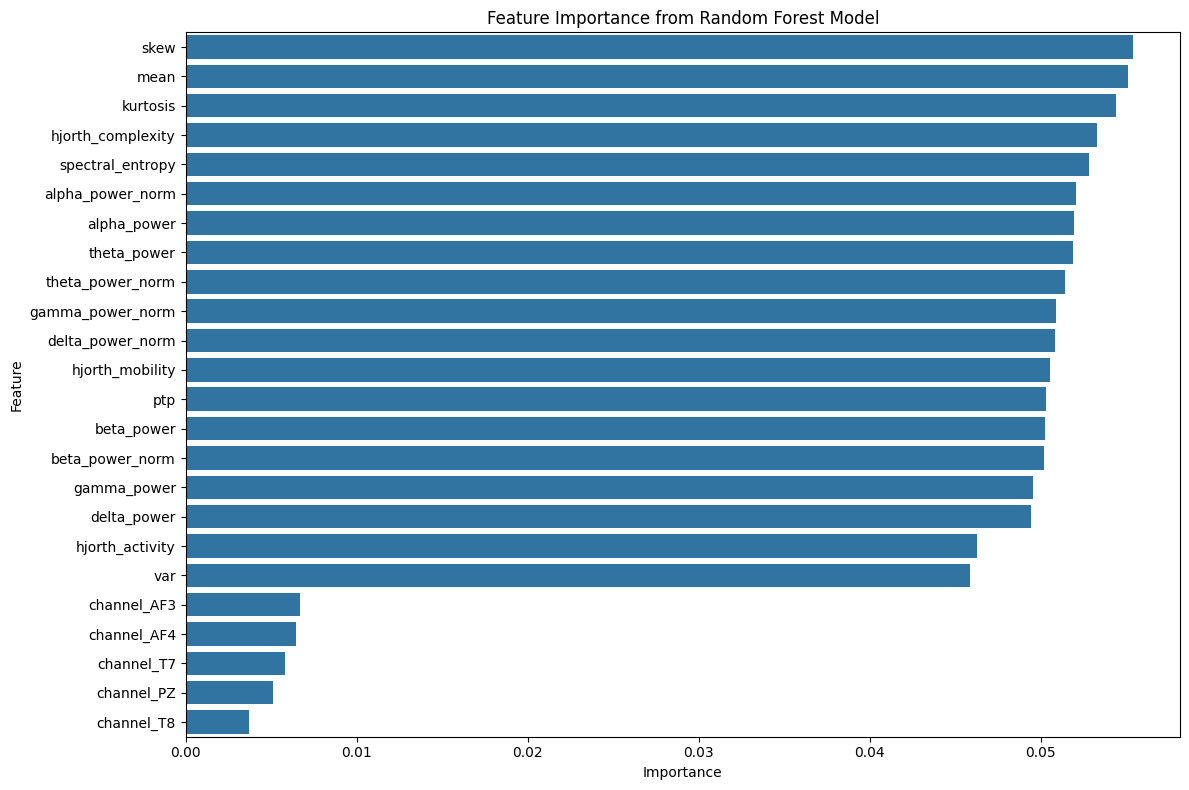

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort features by importance
feature_importance_series_sorted = feature_importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_series_sorted.values, y=feature_importance_series_sorted.index)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [11]:
!pip install xgboost

In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and display performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(report_xgb)

XGBoost Model Accuracy: 0.1156

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.10      0.11      1282
           1       0.12      0.15      0.13      1313
           2       0.11      0.12      0.11      1284
           3       0.13      0.13      0.13      1364
           4       0.11      0.12      0.12      1289
           5       0.12      0.12      0.12      1272
           6       0.10      0.09      0.10      1287
           7       0.11      0.12      0.11      1259
           8       0.12      0.12      0.12      1346
           9       0.11      0.10      0.11      1354

    accuracy                           0.12     13050
   macro avg       0.12      0.12      0.12     13050
weighted avg       0.12      0.12      0.12     13050



In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the MLPClassifier model
# Using default parameters for a simple model
mlp_model = MLPClassifier(random_state=42, max_iter=300)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Calculate and display performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

print(f"MLP Classifier Model Accuracy: {accuracy_mlp:.4f}")
print("\nMLP Classifier Classification Report:")
print(report_mlp)

MLP Classifier Model Accuracy: 0.1077

MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.09      0.10      1282
           1       0.11      0.12      0.12      1313
           2       0.10      0.11      0.10      1284
           3       0.11      0.08      0.09      1364
           4       0.11      0.13      0.12      1289
           5       0.11      0.10      0.10      1272
           6       0.11      0.08      0.10      1287
           7       0.10      0.10      0.10      1259
           8       0.11      0.16      0.13      1346
           9       0.09      0.10      0.10      1354

    accuracy                           0.11     13050
   macro avg       0.11      0.11      0.11     13050
weighted avg       0.11      0.11      0.11     13050



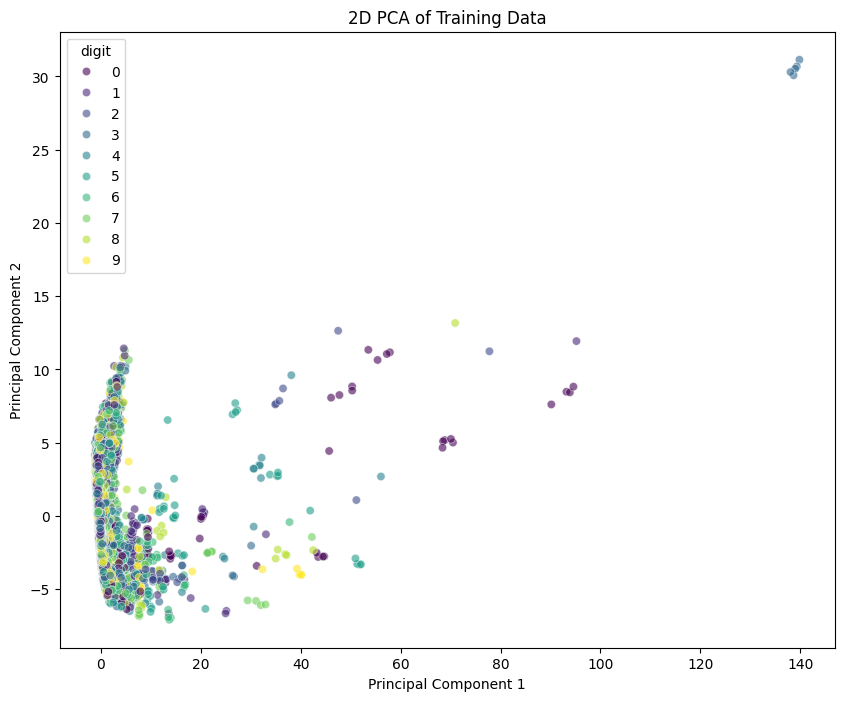

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA for 2 components on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_train_pca, columns=['principal component 1', 'principal component 2'])

# Add the target variable to the PCA DataFrame (using y_train's index)
pca_df['digit'] = y_train.reset_index(drop=True)

# Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='digit', data=pca_df, palette='viridis', legend='full', alpha=0.6)
plt.title('2D PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()